In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [2]:
os.chdir('C:\Users\tutej\OneDrive\Desktop\Machine-Learning-Bike-Price-Prediction-main')   

In [3]:
df=pd.read_csv('bike.csv')

In [4]:
df.head(3)

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0


In [5]:
df.isnull().sum()

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

In [6]:
df['name'].unique()

array(['Royal Enfield Classic 350', 'Honda Dio',
       'Royal Enfield Classic Gunmetal Grey',
       'Yamaha Fazer FI V 2.0 [2016-2018]', 'Yamaha SZ [2013-2014]',
       'Honda CB Twister', 'Honda CB Hornet 160R',
       'Royal Enfield Bullet 350 [2007-2011]', 'Hero Honda CBZ extreme',
       'Bajaj Discover 125', 'Yamaha FZ16', 'Honda Navi',
       'Bajaj Avenger Street 220', 'Yamaha YZF R3', 'Jawa 42',
       'Suzuki Access 125 [2007-2016]', 'Hero Honda Glamour',
       'Yamaha YZF R15 S', 'Yamaha FZ25', 'Hero Passion Pro 110',
       'Honda Navi [2016-2017]', 'Honda Activa i', 'Jawa Standard',
       'Royal Enfield Thunderbird 350', 'Honda Dream Yuga',
       'TVS Apache RTR 160 4V', 'Yamaha Fazer [2009-2016]',
       'Hero Honda Splendor NXG', 'Hero Glamour 125',
       'Yamaha FZ S [2012-2016]', 'Hero Xtreme Sports', 'Honda X-Blade',
       'Honda CB Shine SP', 'Honda Activa 5G', 'Honda CBR-250R',
       'Hero Honda Passion PRO [2012]', 'Bajaj Dominar 400',
       'Hero Glamour F

In [7]:
name_map=df['name'].value_counts()

In [8]:
df['name']=df['name'].map(name_map)

In [9]:
df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,27,175000,2019,Individual,1st owner,350,NaN
1,9,45000,2017,Individual,1st owner,5650,NaN
2,7,150000,2018,Individual,1st owner,12000,148114.0
3,2,65000,2015,Individual,1st owner,23000,89643.0
4,1,20000,2011,Individual,2nd owner,21000,NaN


In [10]:
df['name'].unique()

array([27,  9,  7,  2,  1,  6, 22,  5, 11, 16, 12,  4,  3, 19, 10, 41, 15,
       14, 23,  8, 20, 13, 17], dtype=int64)

In [11]:
df[df.loc[:,'name']==27]['ex_showroom_price'].replace(np.nan,df[df.loc[:,'name']==27]['ex_showroom_price'].median())

0      147000.0
101    147000.0
127    147000.0
142    147000.0
168    147000.0
179    147000.0
221    147000.0
297    147000.0
313    147000.0
316    147000.0
328    147000.0
335    147000.0
369    147000.0
465    147000.0
475    147000.0
725    147000.0
826    147000.0
839    147000.0
849    147000.0
861    147000.0
964    147000.0
969    147000.0
974    147000.0
975    147000.0
976    147000.0
978    147000.0
983    147000.0
Name: ex_showroom_price, dtype: float64

In [12]:
df_median=df.copy()
for var in df['name'].unique():
    df_median.update(df[df.loc[:,'name']==var]['ex_showroom_price'].replace(np.nan,df[df.loc[:,'name']==var]['ex_showroom_price'].median()))

In [13]:
df_median.isnull().sum()

name                  0
selling_price         0
year                  0
seller_type           0
owner                 0
km_driven             0
ex_showroom_price    36
dtype: int64

In [14]:
df_median

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,27,175000,2019,Individual,1st owner,350,147000.0
1,9,45000,2017,Individual,1st owner,5650,64750.0
2,7,150000,2018,Individual,1st owner,12000,148114.0
3,2,65000,2015,Individual,1st owner,23000,89643.0
4,1,20000,2011,Individual,2nd owner,21000,78300.0
5,6,18000,2010,Individual,1st owner,60000,53857.0
6,22,78500,2018,Individual,1st owner,17000,87719.0
7,5,180000,2008,Individual,2nd owner,39000,78350.0
8,11,30000,2010,Individual,1st owner,32000,61600.0
9,16,50000,2016,Individual,1st owner,42000,60122.0


In [15]:
mean=df_median['ex_showroom_price'].mean()
mean

82361.98536585366

In [16]:
df_median['ex_showroom_price'].isnull().sum()

36

In [17]:
df_median['ex_showroom_price']=df_median['ex_showroom_price'].fillna(mean)

In [18]:
df_median.isnull().sum()

name                 0
selling_price        0
year                 0
seller_type          0
owner                0
km_driven            0
ex_showroom_price    0
dtype: int64

In [19]:
df=df_median

In [20]:
df.isnull().sum()

name                 0
selling_price        0
year                 0
seller_type          0
owner                0
km_driven            0
ex_showroom_price    0
dtype: int64

In [21]:
df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,27,175000,2019,Individual,1st owner,350,147000.0
1,9,45000,2017,Individual,1st owner,5650,64750.0
2,7,150000,2018,Individual,1st owner,12000,148114.0
3,2,65000,2015,Individual,1st owner,23000,89643.0
4,1,20000,2011,Individual,2nd owner,21000,78300.0


In [22]:
df['seller_type'].unique()

array(['Individual', 'Dealer'], dtype=object)

In [23]:
seller_type_map={'Individual':1, 'Dealer':2}

In [24]:
df['seller_type']=df['seller_type'].map(seller_type_map)

In [25]:
df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,27,175000,2019,1,1st owner,350,147000.0
1,9,45000,2017,1,1st owner,5650,64750.0
2,7,150000,2018,1,1st owner,12000,148114.0
3,2,65000,2015,1,1st owner,23000,89643.0
4,1,20000,2011,1,2nd owner,21000,78300.0


In [26]:
df['owner'].unique()

array(['1st owner', '2nd owner', '3rd owner', '4th owner'], dtype=object)

In [27]:
owner_map={'1st owner':1, '2nd owner':2, '3rd owner':3, '4th owner':4}

In [28]:
df['owner']=df['owner'].map(owner_map)

In [29]:
df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,27,175000,2019,1,1,350,147000.0
1,9,45000,2017,1,1,5650,64750.0
2,7,150000,2018,1,1,12000,148114.0
3,2,65000,2015,1,1,23000,89643.0
4,1,20000,2011,1,2,21000,78300.0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   int64  
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   int64  
 4   owner              1061 non-null   int64  
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  1061 non-null   float64
dtypes: float64(1), int64(6)
memory usage: 58.1 KB


In [31]:
df['current_year']=2020

In [32]:
df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,current_year
0,27,175000,2019,1,1,350,147000.0,2020
1,9,45000,2017,1,1,5650,64750.0,2020
2,7,150000,2018,1,1,12000,148114.0,2020
3,2,65000,2015,1,1,23000,89643.0,2020
4,1,20000,2011,1,2,21000,78300.0,2020


In [33]:
df['Num_of Year']=df['current_year']-df['year']

In [34]:
df.head(2)

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,current_year,Num_of Year
0,27,175000,2019,1,1,350,147000.0,2020,1
1,9,45000,2017,1,1,5650,64750.0,2020,3


In [35]:
df.drop(['year','current_year'],axis=1,inplace=True)

In [36]:
df.head(2)

,name,selling_price,seller_type,owner,km_driven,ex_showroom_price,Num_of Year
0,27,175000,1,1,350,147000.0,1
1,9,45000,1,1,5650,64750.0,3


In [37]:
X=df.drop('selling_price',axis=1)

In [38]:
y=df['selling_price']

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,confusion_matrix,classification_report,accuracy_score
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [40]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [41]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((848, 6), (213, 6), (848,), (213,))

In [42]:
ms=MinMaxScaler()

In [43]:
X_train_ms=ms.fit_transform(X_train)
X_test_ms=ms.fit_transform(X_test)

In [44]:
X_train_ms=pd.DataFrame(X_train_ms,columns=X_train.columns)
X_test_ms=pd.DataFrame(X_test_ms,columns=X_test.columns)

### Check Model for best Accuracy

In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [46]:
def check_model(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print('r2_score:',r2_score(y_test,y_pred))

In [47]:
check_model(LinearRegression(),X_train,X_test,y_train,y_test)

r2_score: 0.769799481849071


In [48]:
check_model(RandomForestRegressor(),X_train,X_test,y_train,y_test)

r2_score: 0.8397277918069375


In [49]:
check_model(DecisionTreeRegressor(),X_train,X_test,y_train,y_test)

r2_score: 0.6346434423503109


In [50]:
check_model(KNeighborsRegressor(),X_train,X_test,y_train,y_test)

r2_score: 0.7175031485404413


In [51]:
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
print('r2_score:',r2_score(y_test,y_pred))

r2_score: 0.8428033628295609


In [52]:
cv=cross_val_score(RandomForestRegressor(n_estimators=250),X_train,y_train,cv=5)
print(np.average(cv))

0.6414110711721428


In [53]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV

In [54]:
clf= GridSearchCV(RandomForestRegressor(), {
    'n_estimators': [100,150,200,250,300]},cv=5,return_train_score=False)
clf.fit(X_train,y_train)
clf

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [55]:
clf.cv_results_

{'mean_fit_time': array([0.26641426, 0.40240684, 0.5726018 , 0.65579877, 0.73400402]),
 'std_fit_time': array([0.00739935, 0.00697249, 0.09894675, 0.07963353, 0.00418643]),
 'mean_score_time': array([0.01099548, 0.01699762, 0.02020054, 0.02380171, 0.02800093]),
 'std_score_time': array([6.32250894e-04, 1.89971551e-03, 7.47997131e-04, 7.48748962e-04,
        7.62939453e-07]),
 'param_n_estimators': masked_array(data=[100, 150, 200, 250, 300],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 100},
  {'n_estimators': 150},
  {'n_estimators': 200},
  {'n_estimators': 250},
  {'n_estimators': 300}],
 'split0_test_score': array([0.73400597, 0.74103133, 0.745057  , 0.74386884, 0.74559773]),
 'split1_test_score': array([0.71181147, 0.70291325, 0.6985118 , 0.71496766, 0.71177009]),
 'split2_test_score': array([0.58092531, 0.59091969, 0.59813477, 0.62110686, 0.58933069]),
 'split3_test_score': array([0.671599

In [56]:
clf.best_score_

0.643507449775764

In [57]:
clf.score(X_test,y_test)

0.8496387007329393

In [58]:
df=pd.DataFrame(clf.cv_results_)

In [59]:
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.266414,0.007399,0.010995,6.322509e-04,100,{'n_estimators': 100},0.734006,0.711811,0.580925,0.671599,0.459429,0.631554,0.100729,5
1,0.402407,0.006972,0.016998,1.899716e-03,150,{'n_estimators': 150},0.741031,0.702913,0.590920,0.674316,0.450101,0.631856,0.103423,4
2,0.572602,0.098947,0.020201,7.479971e-04,200,{'n_estimators': 200},0.745057,0.698512,0.598135,0.693011,0.472231,0.641389,0.097119,2
3,0.655799,0.079634,0.023802,7.487490e-04,250,{'n_estimators': 250},0.743869,0.714968,0.621107,0.682699,0.454895,0.643507,0.102753,1
4,0.734004,0.004186,0.028001,7.629395e-07,300,{'n_estimators': 300},0.745598,0.711770,0.589331,0.677750,0.458187,0.636527,0.103238,3


In [60]:
df[['param_n_estimators','params','mean_test_score']]

,param_n_estimators,params,mean_test_score
0,100,{'n_estimators': 100},0.631554
1,150,{'n_estimators': 150},0.631856
2,200,{'n_estimators': 200},0.641389
3,250,{'n_estimators': 250},0.643507
4,300,{'n_estimators': 300},0.636527


In [61]:
clf.best_params_

{'n_estimators': 250}

In [62]:
clf.best_score_

0.643507449775764

In [63]:
rf=RandomForestRegressor(n_estimators=250)
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
print('r2_score:',r2_score(y_test,y_pred))
print('MSE:',mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('MAE:',mean_absolute_error(y_test,y_pred))

r2_score: 0.8388436455679857
MSE: 424935455.15195304
RMSE: 20613.962626141365
MAE: 14786.419556494522


In [64]:
cv=cross_val_score(RandomForestRegressor(n_estimators=250),X_train,y_train,cv=5)
print(np.average(cv))

0.6421873182396357


In [65]:
rf.score(X_test,y_test)

0.8388436455679857

In [66]:
rf.score(X_train,y_train)

0.9651409224307809

### Save Model in Pickle & Joblib

In [67]:
import pickle
import joblib

In [68]:
pickle.dump(rf,open('rf_model.pkl','wb'))

In [69]:
joblib.dump(rf,'rf_model.joblib')

['rf_model.joblib']

#### load pickle Model

In [70]:
model=pickle.load(open('rf_model.pkl','rb'))

In [71]:
y_pred=model.predict(X_test)

In [72]:
model.score(X_train,y_train)

0.9651409224307809

In [73]:
model.score(X_test,y_test)

0.8388436455679857

#### load joblib Model

In [74]:
model_jb=joblib.load('rf_model.joblib')

In [75]:
model_jb.score(X_train,y_train)

0.9651409224307809

In [76]:
model_jb.score(X_test,y_test)

0.8388436455679857

In [77]:
model.predict([[7,1,1,75000,79432.0,7]])

array([43052.])

In [78]:
X_test.head(2)

,name,seller_type,owner,km_driven,ex_showroom_price,Num_of Year
31,7,1,1,75000,79432.0,7
413,4,1,1,40000,58314.0,9


<AxesSubplot:xlabel='selling_price'>

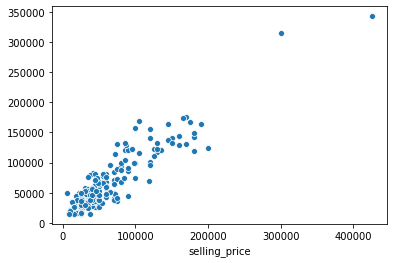

In [79]:
sns.scatterplot(y_test,y_pred)

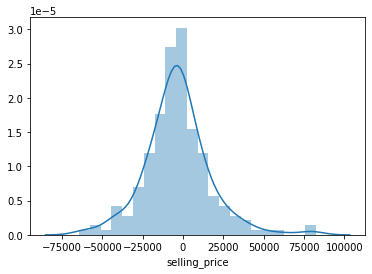

In [80]:
sns.distplot(y_test-y_pred)
plt.show()